In [241]:
!pip install numpy pandas




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [242]:
import numpy as np
import pandas as pd

In [243]:
df = pd.read_csv('lingSpam.csv')

In [244]:
df.sample(10)

,Unnamed: 0,Body,Label
2374,2374,"Subject: franklin clipper ( esl / efl , etc . ...",0
324,324,"Subject: sci - fi convention\n \n hi , i was a...",1
875,875,Subject: 4 . internationale arbeitstagung f r ...,0
1151,1151,Subject: stress bibliography\n \n content - le...,0
765,765,Subject: re : 5 . 1370 can the comparative met...,0
1119,1119,"Subject: "" sycophant "" , more .\n \n subsequen...",0
1110,1110,"Subject: ipa , austerlitz\n \n i learned phone...",0
1751,1751,Subject: 2nd acm international conference on d...,0
1650,1650,Subject: on line versions of newspapers\n \n d...,0
1534,1534,Subject: review of arboreal for windows\n \n r...,0


In [245]:
df =  pd.read_csv('completeSpamAssassin.csv')

In [246]:
df.sample(10)

,Unnamed: 0,Body,Label
357,357,Get your favorite Poker action at http://www.m...,1
2317,2317,"Hindus got 3 billion gods..... So, losing one ...",0
4207,4207,URL: http://diveintomark.org/archives/2002/10/...,0
5497,5497,"> On Wed, Aug 07, 2002 at 03:08:08PM -0400, R....",0
2356,2356,i agree with rob. i think if the phones (and m...,0
6006,6006,"Hi all,I cannot to get this to run... I think...",0
2208,2208,"On Mon, 26 Aug 2002, Jim Whitehead wrote:\n--]...",0
4421,4421,Lacking in a _____\n\t / ___ \\n\t / /...,0
1089,1089,Lose weight while building lean muscle mass\nÂ...,1
5269,5269,">\n> Hit or miss, Groundhog Day 2019 is going ...",0


In [247]:
df.shape

(6046, 3)

In [248]:
df.isnull().sum()

Unnamed: 0    0
Body          1
Label         0
dtype: int64

In [249]:
df.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [250]:
df.duplicated().sum()

np.int64(0)

In [251]:
df.shape

(6046, 3)

In [252]:
 df['Label'].value_counts()

Label
0    4150
1    1896
Name: count, dtype: int64

In [253]:
!pip install matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


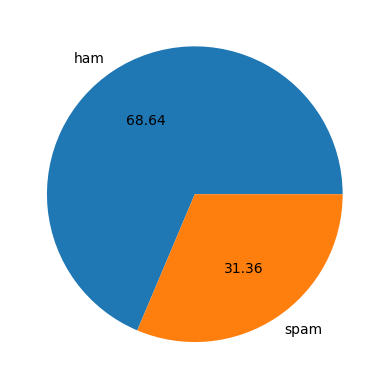

In [254]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(), labels=['ham','spam'], autopct ="%0.2f")
plt.show()

In [255]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [256]:
import nltk

In [257]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [258]:
df['no_of_characters'] = df['Body'].apply(lambda x: len(str(x)))


In [259]:
df.head()

,Unnamed: 0,Body,Label,no_of_characters
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610
3,3,##############################################...,1,2863
4,4,I thought you might like these:\n1) Slim Down ...,1,641


In [260]:
print(df.isnull().sum())


Unnamed: 0          0
Body                1
Label               0
no_of_characters    0
dtype: int64


In [261]:
df = df.dropna()


In [262]:
df = df.dropna().reset_index(drop=True)


In [263]:
df['Body'].apply(lambda x:nltk.word_tokenize(x))

0       [Save, up, to, 70, %, on, Life, Insurance, ., ...
1       [1, ), Fight, The, Risk, of, Cancer, !, http, ...
2       [1, ), Fight, The, Risk, of, Cancer, !, http, ...
3       [#, #, #, #, #, #, #, #, #, #, #, #, #, #, #, ...
4       [I, thought, you, might, like, these, :, 1, ),...
                              ...                        
6040                                              [empty]
6041    [___, ___, ___, /\, \, /\, \, /\, \, ___, |, :...
6042    [IN, THIS, ISSUE:01, ., Readers, write, 02, .,...
6043                                              [empty]
6044                                              [empty]
Name: Body, Length: 6045, dtype: object

In [264]:
df['Body'].apply(lambda x: nltk.word_tokenize(x))


0       [Save, up, to, 70, %, on, Life, Insurance, ., ...
1       [1, ), Fight, The, Risk, of, Cancer, !, http, ...
2       [1, ), Fight, The, Risk, of, Cancer, !, http, ...
3       [#, #, #, #, #, #, #, #, #, #, #, #, #, #, #, ...
4       [I, thought, you, might, like, these, :, 1, ),...
                              ...                        
6040                                              [empty]
6041    [___, ___, ___, /\, \, /\, \, /\, \, ___, |, :...
6042    [IN, THIS, ISSUE:01, ., Readers, write, 02, .,...
6043                                              [empty]
6044                                              [empty]
Name: Body, Length: 6045, dtype: object

In [265]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [266]:
 df['no_of_words'] = df['Body'].apply(lambda x:len(nltk.word_tokenize(x)))

In [267]:
df.head()

,Unnamed: 0,Body,Label,no_of_characters,no_of_words
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113
3,3,##############################################...,1,2863,690
4,4,I thought you might like these:\n1) Slim Down ...,1,641,108


In [268]:
df['no_of_sentences'] = df['Body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [269]:
df.head()

,Unnamed: 0,Body,Label,no_of_characters,no_of_words,no_of_sentences
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4
3,3,##############################################...,1,2863,690,35
4,4,I thought you might like these:\n1) Slim Down ...,1,641,108,4


In [270]:
df[['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,6045.000000,6045.000000,6045.000000
mean,1758.272787,328.882878,11.714971
std,4940.284032,766.591788,26.649811
min,1.000000,0.000000,0.000000
25%,439.000000,82.000000,3.000000
50%,899.000000,173.000000,6.000000
75%,1624.000000,318.000000,11.000000
max,194978.000000,18571.000000,808.000000


In [271]:
#Ham emails
df[df['Label'] == 0] [['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4150.000000,4150.000000,4150.000000
mean,1699.373253,323.129398,10.936627
std,4898.320247,758.316457,25.428544
min,5.000000,1.000000,1.000000
25%,450.250000,85.000000,3.000000
50%,896.000000,176.000000,6.000000
75%,1594.750000,318.000000,11.000000
max,194978.000000,18571.000000,808.000000


In [272]:
#spam emails
df[df['Label'] == 1] [['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,1895.000000,1895.000000,1895.000000
mean,1887.261214,341.482850,13.419525
std,5029.857585,784.465001,29.080556
min,1.000000,0.000000,0.000000
25%,399.000000,70.000000,2.000000
50%,904.000000,162.000000,7.000000
75%,1700.000000,315.500000,12.000000
max,129635.000000,13292.000000,406.000000


In [273]:
 import seaborn as sns

In [274]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [275]:
 import seaborn as sns

In [276]:
df[df['Label'] == 0]

,Unnamed: 0,Body,Label,no_of_characters,no_of_words,no_of_sentences
1895,1896,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0,1530,273,2
1896,1897,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,887,205,5
1897,1898,Man Threatens Explosion In Moscow Thursday Aug...,0,1737,351,12
1898,1899,Klez: The Virus That Won't Die\n \nAlready the...,0,1113,185,3
1899,1900,"> in adding cream to spaghetti carbonara, whi...",0,1036,226,6
...,...,...,...,...,...,...
6040,6041,empty,0,5,1,1
6041,6042,___ ___ ...,0,16999,3100,91
6042,6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0,7299,1478,83
6043,6044,empty,0,5,1,1


In [277]:
df.sample(50)

,Unnamed: 0,Body,Label,no_of_characters,no_of_words,no_of_sentences
6025,6026,Here is your administrator password for your Q...,0,748,140,5
2915,2916,"\nHi Folks,I've been trying to set a button ca...",0,1046,142,3
4864,4865,"On Tue, Aug 20, 2002 at 12:06:18PM +0100, Phil...",0,923,194,9
2010,2011,"So, I've been letting the little .exe of SETI@...",0,744,175,9
4178,4179,"URL: http://www.newsisfree.com/click/-6,857277...",0,151,19,1
1298,1299,Untitled DocumentTo unsubscribe or change subs...,1,461,68,2
3549,3550,"On Fri, 6 Sep 2002, Guido van Rossum wrote:>Qu...",0,2596,543,13
2548,2549,Bill Stoddard wrote:>>Chuck Murcko wrote:\n>>\...,0,2462,561,23
4945,4946,"Thu, 25 Jul 2002 18:33:15 -0700 skrev du:> No...",0,1048,188,4
1140,1141,"As seen on NBC, CBS, CNN, and even Oprah! The ...",1,1026,268,17


<Axes: xlabel='no_of_characters', ylabel='Count'>

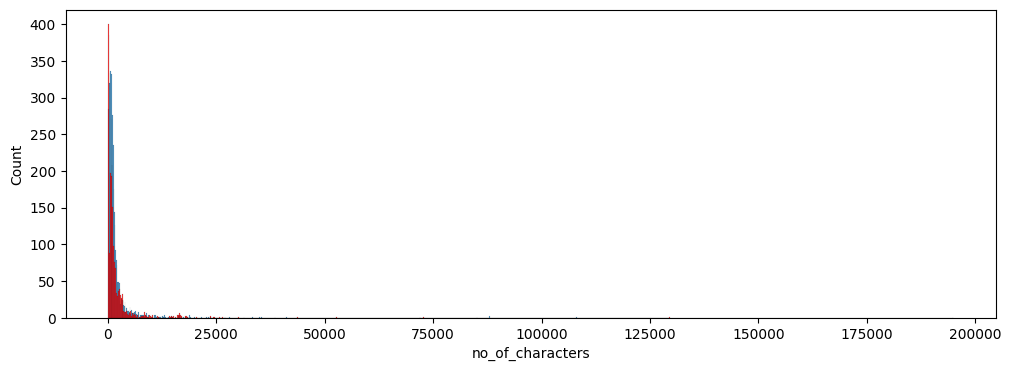

In [278]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['Label'] == 0]['no_of_characters'])
sns.histplot(df[df['Label'] == 1]['no_of_characters'],color='red')

In [279]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [280]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [281]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [282]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [283]:
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [284]:
transform_text(""" 
Save up to 70% on Life Insurance.
Why Spend More Than You Have To? Life Quote Savings
Ensuring your family's financial security is very important.
Life Quote Savings makes buying life insurance simple and affordable.
We Provide FREE Access to The Very Best Companies and The Lowest Rates.
Life Quote Savings is FAST, EASY and SAVES you money! Let us help you get started 
with the best values in the country on new coverage. You can SAVE hundreds or 
even thousands of dollars by requesting a FREE quote from Lifequote Savings. 
Our service will take you less than 5 minutes to complete. Shop and compare. 
SAVE up to 70% on all types of Life insurance! Click Here For Your Free Quote!
Protecting your family is the best investment you'll ever make!

If you are in receipt of this email in error and/or wish to be removed from our list, 
PLEASE CLICK HERE AND TYPE REMOVE. If you reside in any state which prohibits e-mail 
solicitations for insurance, please disregard this email.
""")

'save 70 life insur spend life quot save ensur famili financi secur import life quot save make buy life insur simpl afford provid free access best compani lowest rate life quot save fast easi save money let us help get start best valu countri new coverag save hundr even thousand dollar request free quot lifequot save servic take less 5 minut complet shop compar save 70 type life insur click free quot protect famili best invest ever make receipt email error wish remov list pleas click type remov resid state prohibit solicit insur pleas disregard email'

In [285]:
df['Body'][0]

"\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?Life Quote Savings\nEnsuring your \n      family's financial security is very important. Life Quote Savings makes \n      buying life insurance simple and affordable. We Provide FREE Access to The \n      Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and \n            SAVES you money! Let us help you get started with the best values in \n            the country on new coverage. You can SAVE hundreds or even thousands \n            of dollars by requesting a FREE quote from Lifequote Savings. Our \n            service will take you less than 5 minutes to complete. Shop and \n            compare. SAVE up to 70% on all types of Life insurance! Click Here For Your \n            Free Quote!Protecting your family is the best investment you'll ever \n          make!\nIf you are in receipt of this email \n      in error and/or wish to be removed from our list, PLEASE CLICK HERE AND TYPE REMOVE. If

In [286]:
df['transformed_text'] = df['Body'].apply(transform_text) 

In [287]:
df.head()

,Unnamed: 0,Body,Label,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,3,##############################################...,1,2863,690,35,adult club offer free membership instant acces...
4,4,I thought you might like these:\n1) Slim Down ...,1,641,108,4,thought might like 1 slim guarante lose lb 30 ...


In [288]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [289]:
from wordcloud import WordCloud
wc = WordCloud(width = 800, height = 600 , min_font_size=10,background_color='white')


In [290]:
spam_wc = wc.generate(df[df['Label'] ==1]['transformed_text'].str.cat(sep=" "))


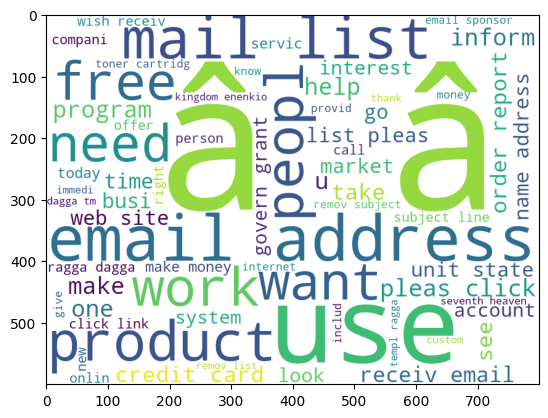

In [291]:
plt.imshow(spam_wc)

In [292]:
ham_wc = wc.generate(df[df['Label'] ==0]['transformed_text'].str.cat(sep=" "))

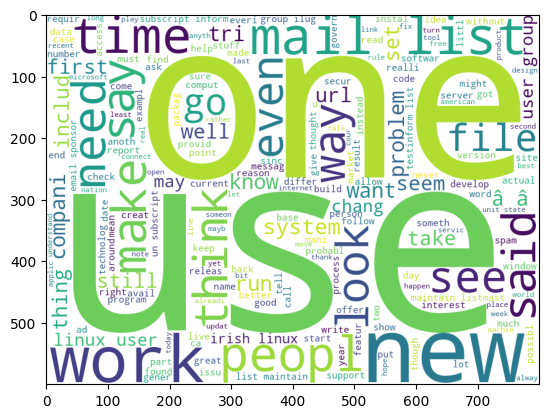

In [293]:
plt.imshow(spam_wc)

In [294]:
df.head()

,Unnamed: 0,Body,Label,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,3,##############################################...,1,2863,690,35,adult club offer free membership instant acces...
4,4,I thought you might like these:\n1) Slim Down ...,1,641,108,4,thought might like 1 slim guarante lose lb 30 ...


In [295]:
spam_corpus =[]
for msg in df[df['Label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [296]:
len(spam_corpus)

276966

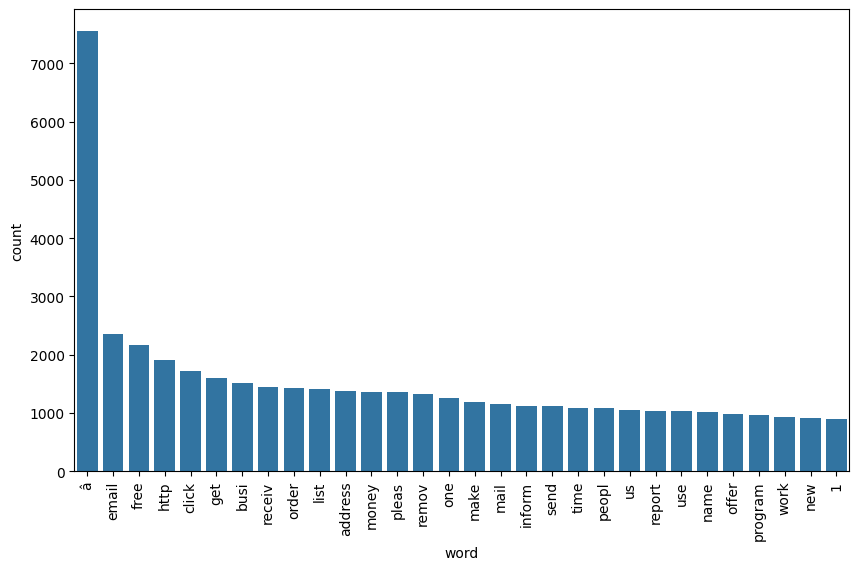

In [297]:
from collections import Counter

# Create DataFrame from most common 30 words
df2 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df2)
plt.xticks(rotation='vertical')
plt.show()

In [298]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [310]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)


In [312]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [313]:
X.shape

(6045, 3000)

In [315]:
y=df['Label'].values

In [316]:
y

array([1, 1, 1, ..., 0, 0, 0], shape=(6045,))

In [317]:
from sklearn.model_selection import train_test_split

In [318]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [319]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [320]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [321]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8395368072787428
[[643 166]
 [ 28 372]]
0.6914498141263941


In [322]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9437551695616212
[[765  44]
 [ 24 376]]
0.8952380952380953


In [323]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9454094292803971
[[759  50]
 [ 16 384]]
0.8847926267281107


In [ ]:
# choosen Counter Vector and mnb

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [325]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [326]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,

}

In [327]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [328]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.652605459057072
Precision -  0.47076023391812866
For  KN
Accuracy -  0.8006617038875103
Precision -  0.6363636363636364
For  NB
Accuracy -  0.9437551695616212
Precision -  0.8952380952380953
For  DT
Accuracy -  0.8866832092638545
Precision -  0.8488063660477454
For  LR
Accuracy -  0.9454094292803971
Precision -  0.8883720930232558
For  RF
Accuracy -  0.9470636889991728
Precision -  0.8870967741935484
For  AdaBoost
Accuracy -  0.8866832092638545
Precision -  0.9368770764119602
For  BgC
Accuracy -  0.923904052936311
Precision -  0.8407079646017699
For  ETC
Accuracy -  0.9437551695616212
Precision -  0.8896713615023474
For  GBDT
Accuracy -  0.9181141439205955
Precision -  0.8753117206982544


In [329]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [330]:
performance_df

,Algorithm,Accuracy,Precision
6,AdaBoost,0.886683,0.936877
2,NB,0.943755,0.895238
8,ETC,0.943755,0.889671
4,LR,0.945409,0.888372
5,RF,0.947064,0.887097
9,GBDT,0.918114,0.875312
3,DT,0.886683,0.848806
7,BgC,0.923904,0.840708
1,KN,0.800662,0.636364
0,SVC,0.652605,0.470760


In [331]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [332]:
performance_df1

,Algorithm,variable,value
0,AdaBoost,Accuracy,0.886683
1,NB,Accuracy,0.943755
2,ETC,Accuracy,0.943755
3,LR,Accuracy,0.945409
4,RF,Accuracy,0.947064
5,GBDT,Accuracy,0.918114
6,DT,Accuracy,0.886683
7,BgC,Accuracy,0.923904
8,KN,Accuracy,0.800662
9,SVC,Accuracy,0.652605


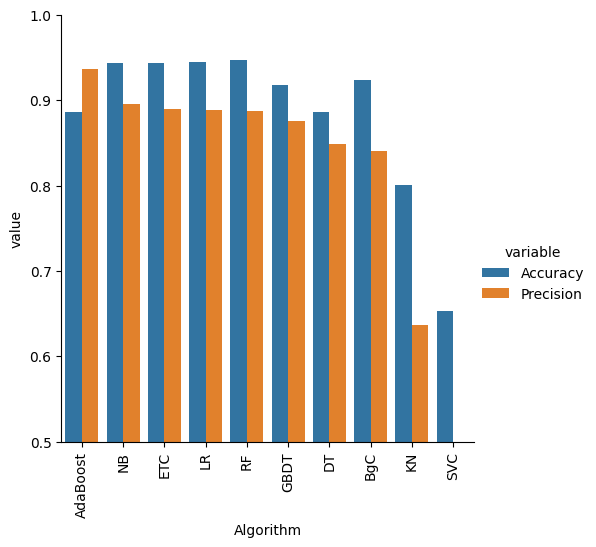

In [333]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [334]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))